In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, silhouette_score
)
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv("/Users/behjiayi/Documents/GitHub/InnovationProject/data/EDA/Cleaned_malware_dataset.csv")
df.head()


,Unnamed: 0,millisecond,classification,state,prio,static_prio,vm_truncate_count,free_area_cache,mm_users,map_count,...,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,utime,stime,gtime
0,0,0,1,-0.168526,-1.105059,-0.848177,-0.657076,0.309909,724,-0.507528,...,120,3473,-0.695251,-0.625663,-0.147906,120,-0.513406,-0.465838,4,-0.509166
1,1,1,1,-0.168526,-1.105059,-0.848177,-0.657076,0.309909,724,-0.507528,...,120,3473,-0.695251,-0.625663,-0.147906,120,-0.513406,-0.465838,4,-0.509166
2,2,2,1,-0.168526,-1.105059,-0.848177,-0.657076,0.309909,724,-0.507528,...,120,3473,-0.695251,-0.625663,-0.147906,120,-0.513406,-0.465838,4,-0.509166
3,3,3,1,-0.168526,-1.105059,-0.848177,-0.657076,0.309909,724,-0.507528,...,120,3473,-0.695251,-0.625663,-0.147906,120,-0.513406,-0.465838,4,-0.509166
4,4,4,1,-0.168526,-1.105059,-0.848177,-0.657076,0.309909,724,-0.507528,...,120,3473,-0.695251,-0.625663,-0.147906,120,-0.513406,-0.465838,4,-0.509166


In [13]:
X = df.drop(columns=["classification", "millisecond"])
y = df["classification"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [14]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_pred_lr))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94     10000
           1       0.94      0.93      0.94     10000

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000

ROC AUC: 0.9373999999999999


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_pred_rf))


Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

ROC AUC: 1.0


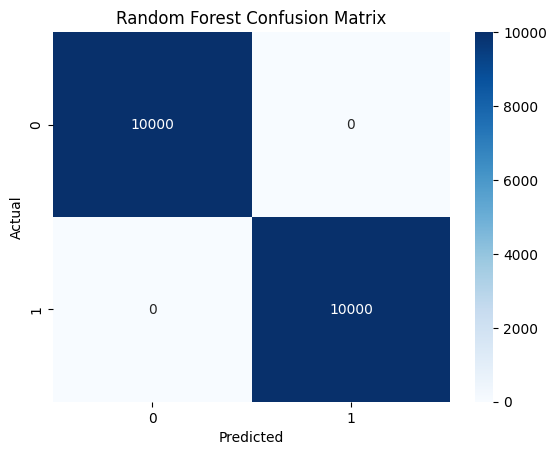

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [17]:
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X)

print("K-Means Silhouette Score:", silhouette_score(X, cluster_labels))


K-Means Silhouette Score: 0.6148803258786457
